In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

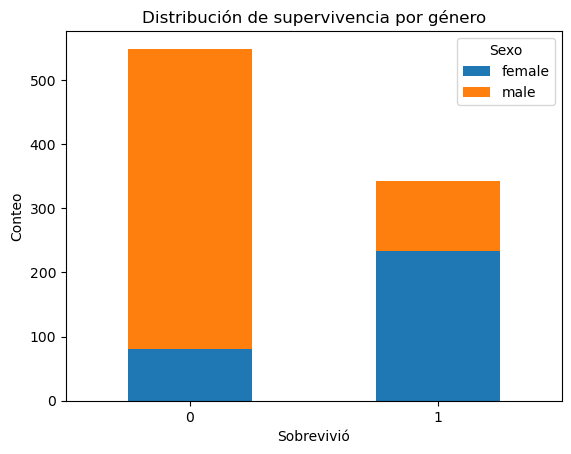

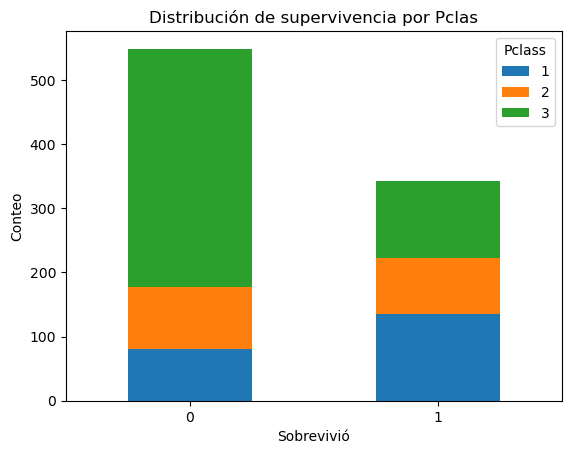

In [9]:
#visualización inicial

pd.crosstab(df['Survived'], df['Sex']).plot(kind= 'bar', stacked=True)
plt.title('Distribución de supervivencia por género')
plt.xlabel('Sobrevivió')
plt.ylabel('Conteo')
plt.xticks(rotation=0)
plt.legend(title='Sexo')
plt.show()

pd.crosstab(df['Survived'], df['Pclass']).plot(kind='bar', stacked=True)
plt.title('Distribución de supervivencia por Pclas')
plt.xlabel('Sobrevivió')
plt.ylabel('Conteo')
plt.xticks(rotation=0)
plt.legend(title='Pclass')
plt.show()

In [15]:
#LIMPIEZA Y PREPROCESAMIENTO DE DATOS
#VALORES NULOS

#Todos los valores nulos de Age, se reemplezaran por el valor de la mediana de sus datos.
df['Age']= df['Age'].fillna(df['Age'].median())

#como cabin tiene bastante valores nulos, y no es un tipo de dato importante para el estudio, lo eliminamos.
df.drop('Cabin', axis=1, inplace=True)

#Los valores nulos de Embarked, se rellenan con el valor más común
df['Embarked']= df['Embarked'].fillna(df['Embarked'].mode()[0])

In [24]:
df.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [25]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [28]:
#convertir las variables categóricas 'Sex' y 'Embarked' usando get_dummies

df = pd.get_dummies(df, columns=['Sex', 'Embarked'])

In [29]:
#DIVIDIR EL DATASET EN CONJUNTOS DE ENTRENAMIENTO Y PRUEBA

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
#CONSTRUIR Y ENTRENAR EL MODELO DE ÁRBOL DE DECISIÓN

#creando el objeto del model de árbol de decisión
model = DecisionTreeClassifier()

#entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
y_pred = model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy:  0.7653631284916201
Confusion Matrix: 
 [[86 19]
 [23 51]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.80       105
           1       0.73      0.69      0.71        74

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.76       179
weighted avg       0.76      0.77      0.76       179



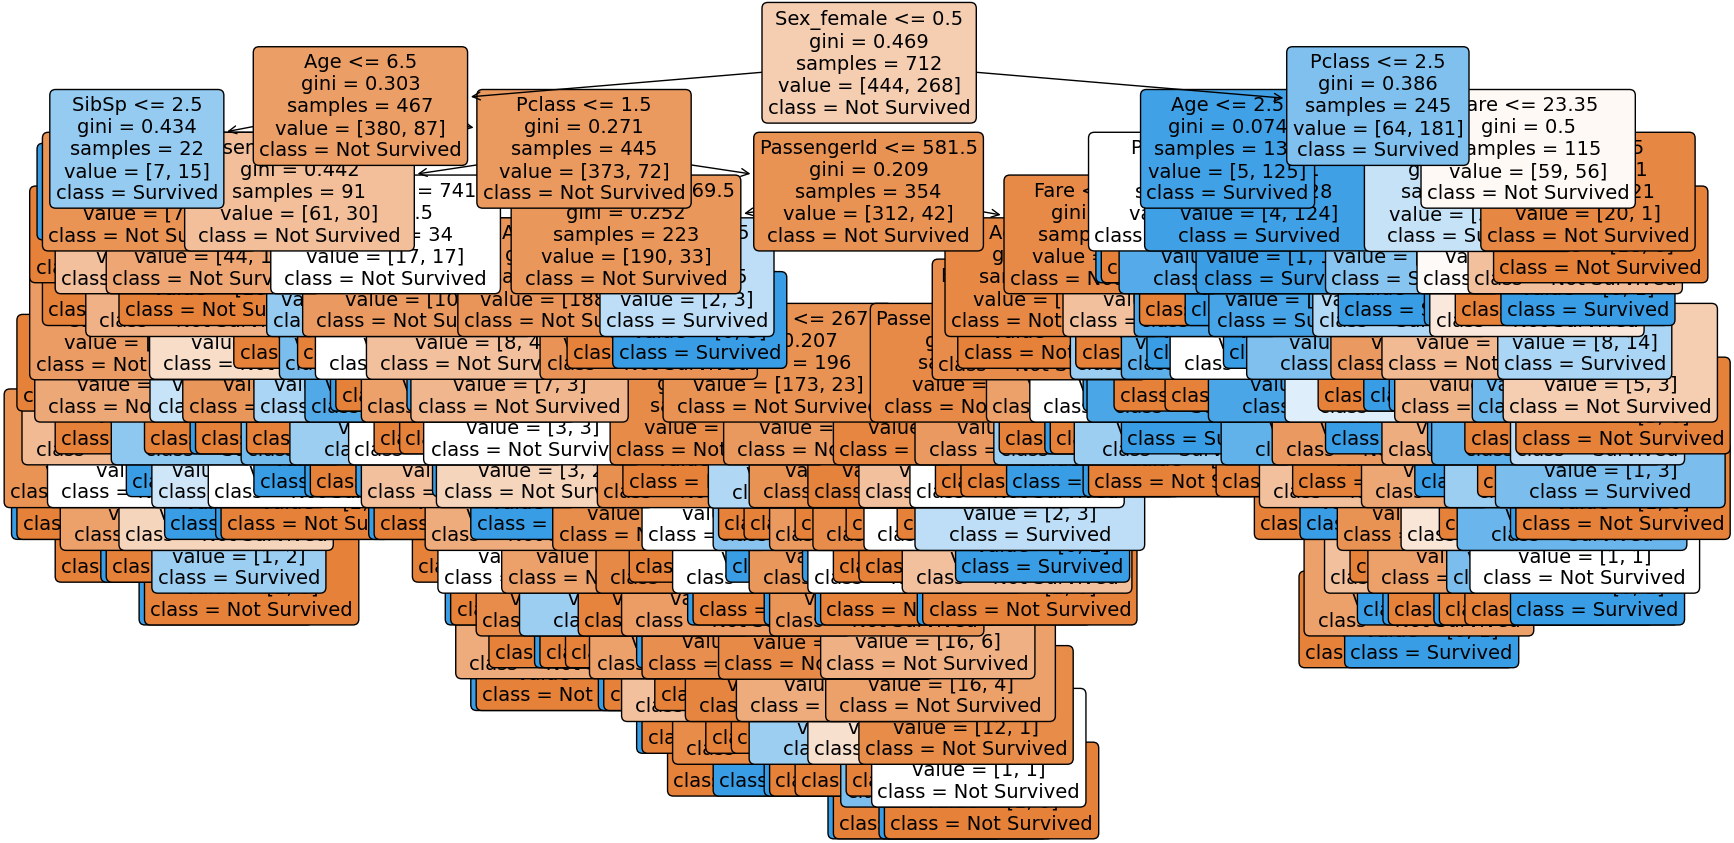

In [32]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

tree.plot_tree(model, filled=True, feature_names=X_train.columns, class_names=['Not Survived', 'Survived'], rounded=True, fontsize=14)
plt.show()

In [33]:
model = DecisionTreeClassifier(max_depth=3)  # Limita la profundidad a 3
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

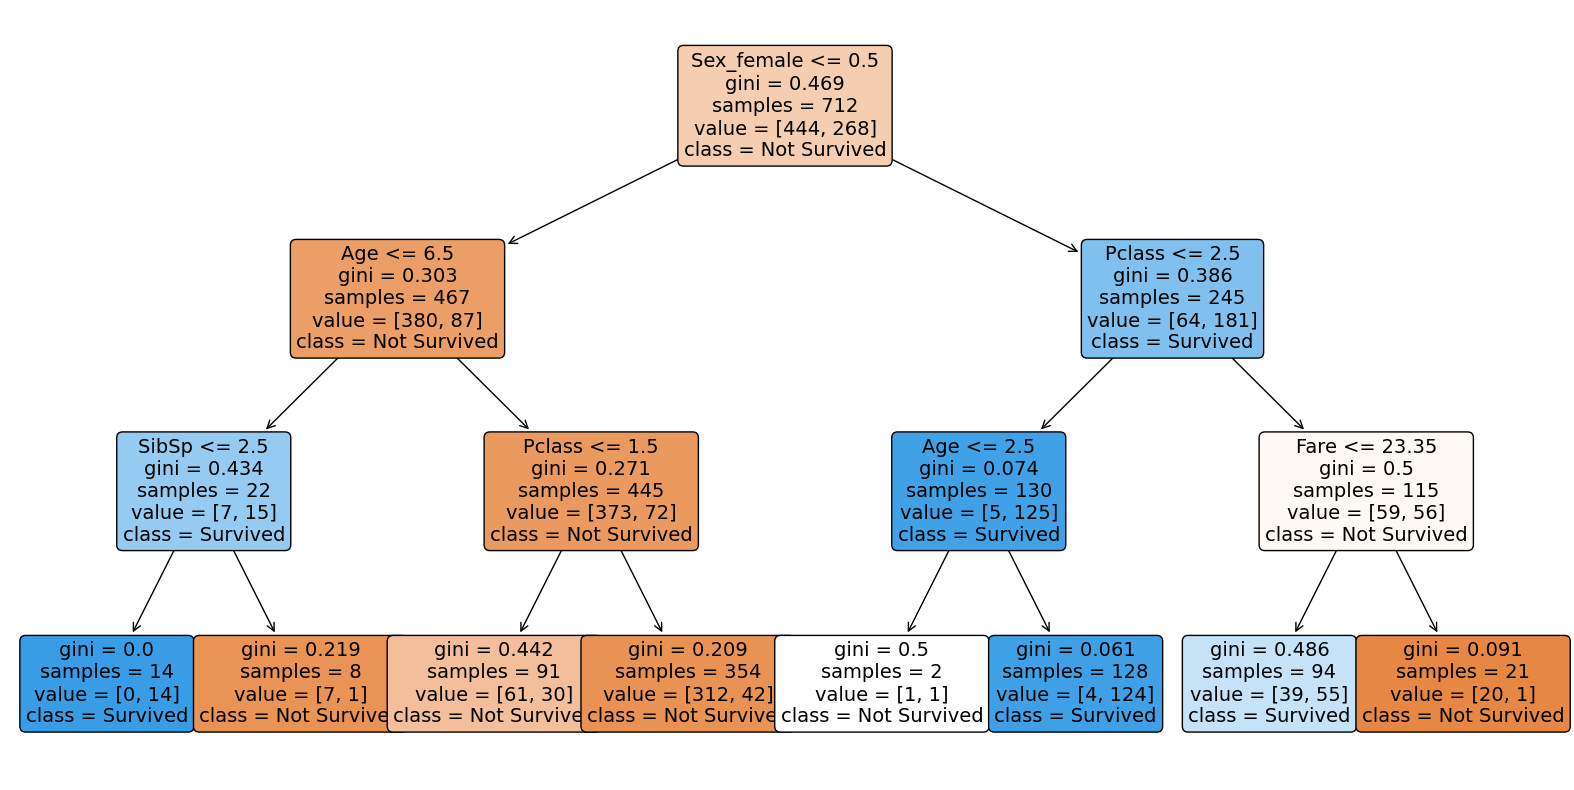

In [35]:
plt.figure(figsize=(20,10))

tree.plot_tree(model, filled=True, feature_names=X_train.columns, class_names=['Not Survived', 'Survived'], rounded=True, fontsize=14)
plt.show()

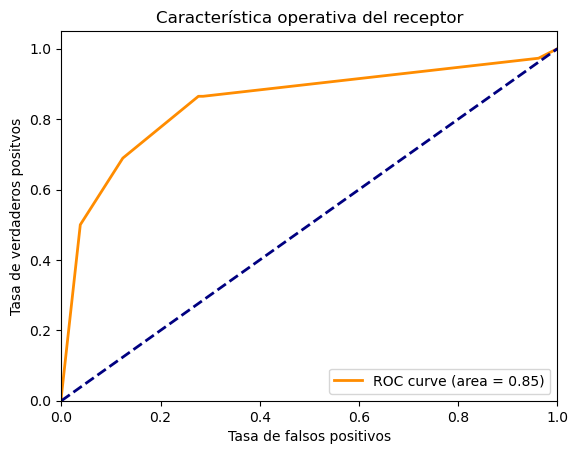

In [38]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positvos')
plt.title('Característica operativa del receptor')
plt.legend(loc="lower right")
plt.show()